<a href="https://colab.research.google.com/github/amolaka/DS-3001---Voting-Project/blob/main/Chloropleth_Maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip3 install mapclassify


In [5]:
pip install --upgrade pip


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [8]:
import geopandas as gpd
import mapclassify
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load data
gdf = gpd.read_file('./VirginiaCounty_ClippedToShoreline.shx') # Load Virginia shapefile for maps
vdf = pd.read_csv('./voting_predictions.csv') # Load historical voting data
cdf = pd.read_csv('./county_adjacencies (1).csv') # Load county adjacency data and population data

# Merge shapefile data and county adjacency data:
gdf['FIPS_left'] = pd.to_numeric(gdf['STCOFIPS'])
df = gdf.merge(cdf,left_on='FIPS_left',right_on='FIPS')  # merge county population and adjacency data into df
del gdf, cdf

<Axes: >

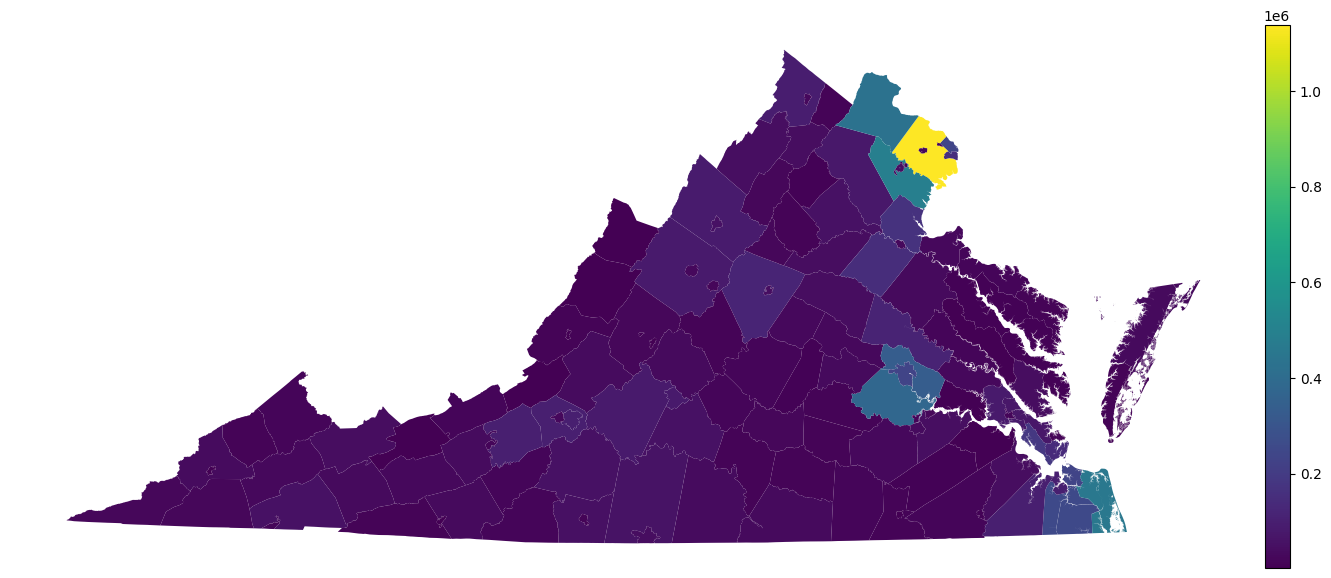

In [9]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
df.plot(ax=ax,column='Population2022',legend=True,cax=cax)

<Axes: >

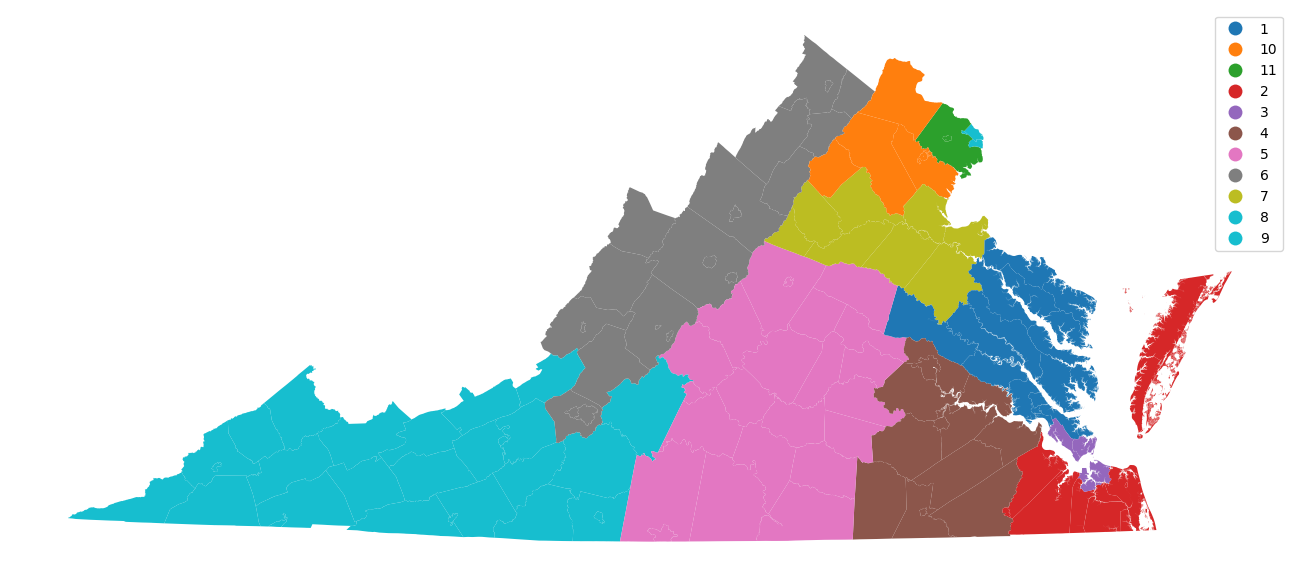

In [10]:
# voting districts
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
#cax = divider.append_axes("right", size="2%", pad=0.08)
df['Districts'] = df['District'].astype(str)
df.plot(ax=ax,column='Districts',legend=True)#,cax=cax

In [14]:

Dvotes = vdf.loc[vdf['democrat_votes'],:].groupby('county_fips')['candidatevotes'].sum()
Dvotes = Dvotes.rename('dem_votes_2020')
df = df.merge(Dvotes,left_on='FIPS_left',right_on='county_fips') #df1.merge(df2, left_on='lkey', right_on='rkey

Rvotes = vdf.loc[vdf['republican_votes'],:].groupby('county_fips')['candidatevotes'].sum()
Rvotes = Rvotes.rename('rep_votes_2020')
df = df.merge(Rvotes,left_on='FIPS_left',right_on='county_fips') #df1.merge(df2, left_on='lkey', right_on='rkey

KeyError: "None of [Index([ 6210.82, 36068.72,  3294.42,  2798.07,  6070.84,  2567.21, 77522.35,\n       15251.63,    745.4, 20750.61,\n       ...\n        2874.94, 69310.62, 26139.86,  6154.99,  6000.29, 25697.21, 96088.42,\n        5376.57,  3835.77,  6025.91],\n      dtype='float64', length=133)] are in the [index]"

<Axes: >

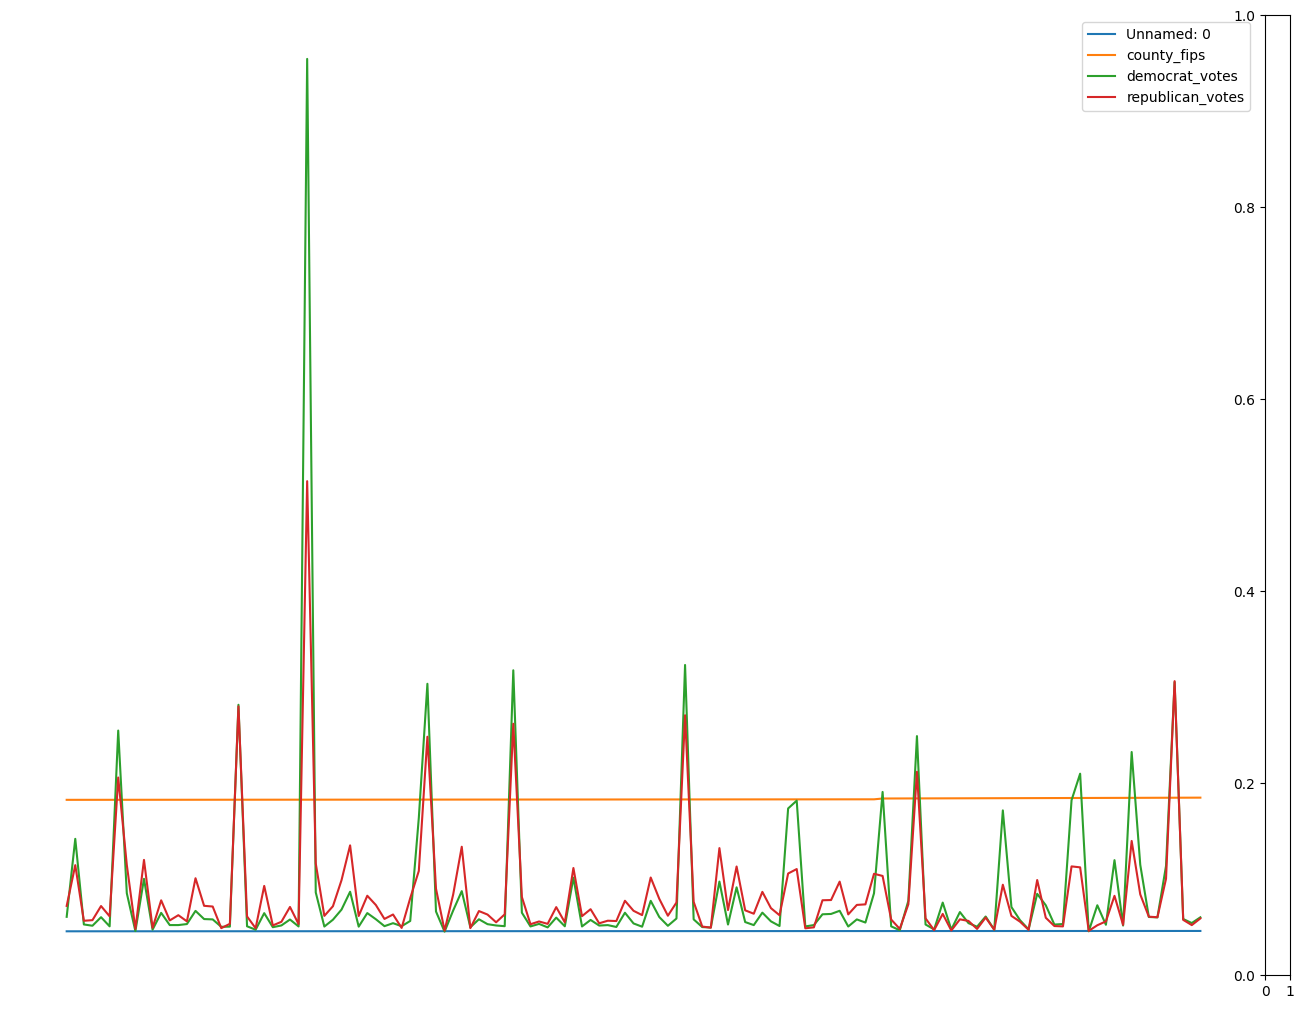

In [16]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
vdf.plot(ax=ax,column='democrat_votes',legend=True)

<Axes: >

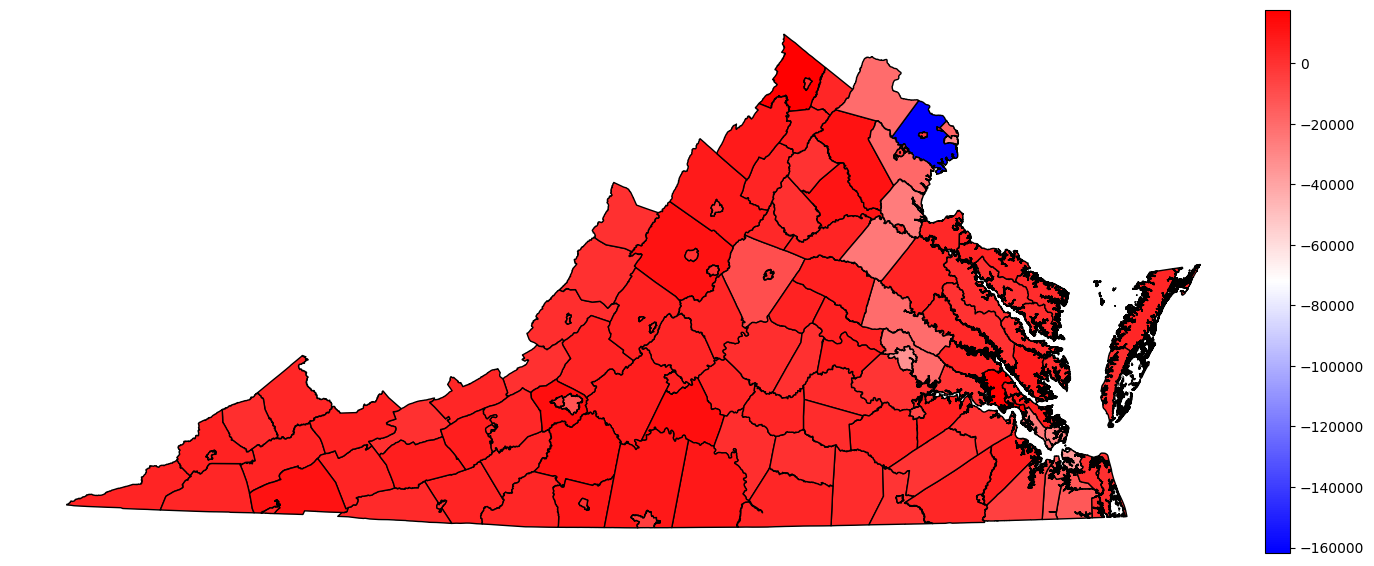

In [23]:
# Difference in Dem and Rep votes:


df['vote_diff'] = vdf['republican_votes']-vdf['democrat_votes']

fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
df.plot(ax=ax,column='vote_diff',legend=True,cax=cax,cmap='bwr',edgecolor='k')

<Axes: >

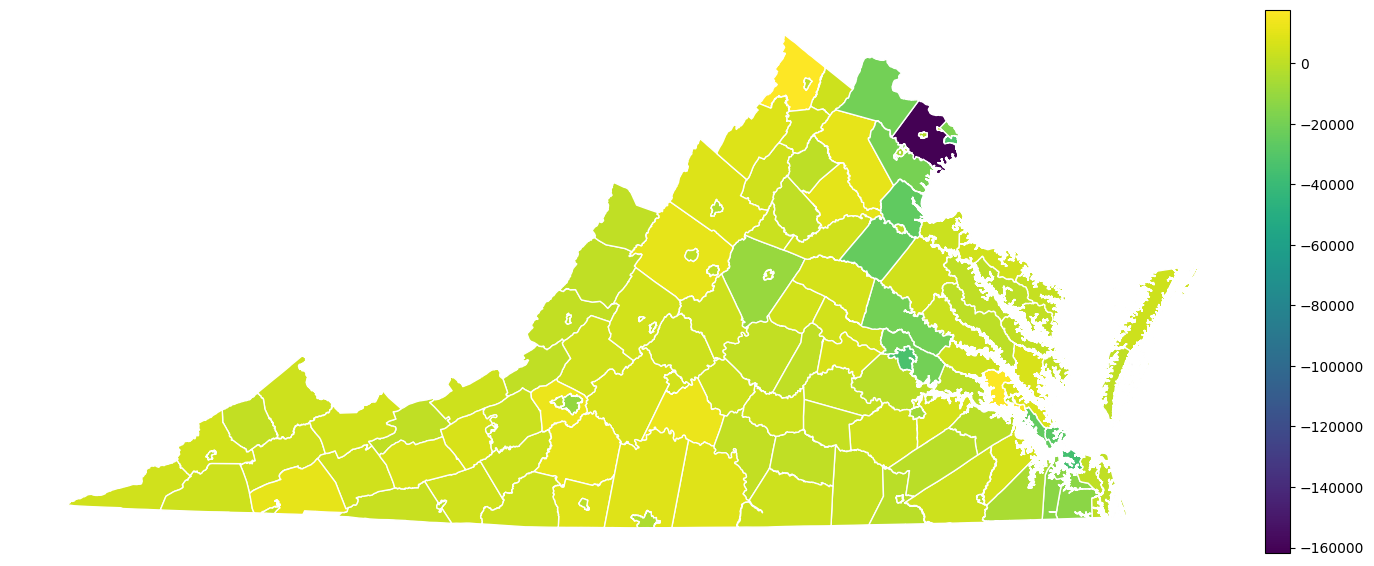

In [24]:
df['vote_diff'] = vdf['republican_votes']-vdf['democrat_votes']

fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
df.plot(ax=ax,column='vote_diff',legend=True,cax=cax,edgecolor='w')

<Axes: >

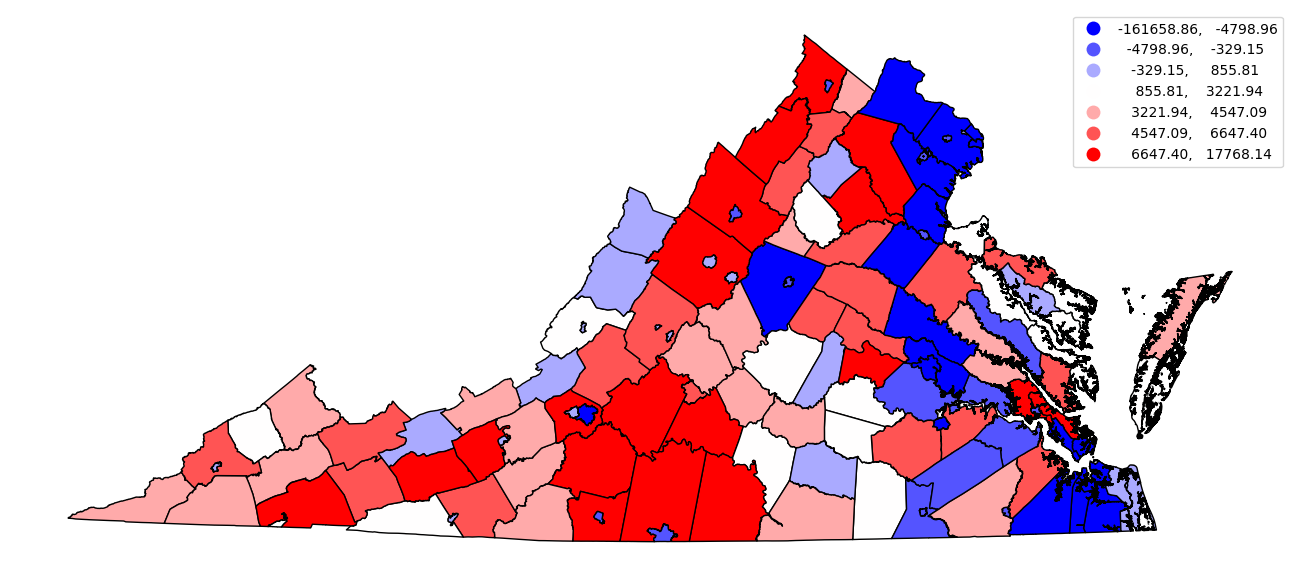

In [25]:
df['vote_diff'] = vdf['republican_votes']-vdf['democrat_votes']

fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
#cax = divider.append_axes("right", size="2%", pad=0.08)
df.plot(ax=ax,column='vote_diff',legend=True,cmap='bwr',edgecolor='k',scheme='Quantiles',k=7)

<Axes: >

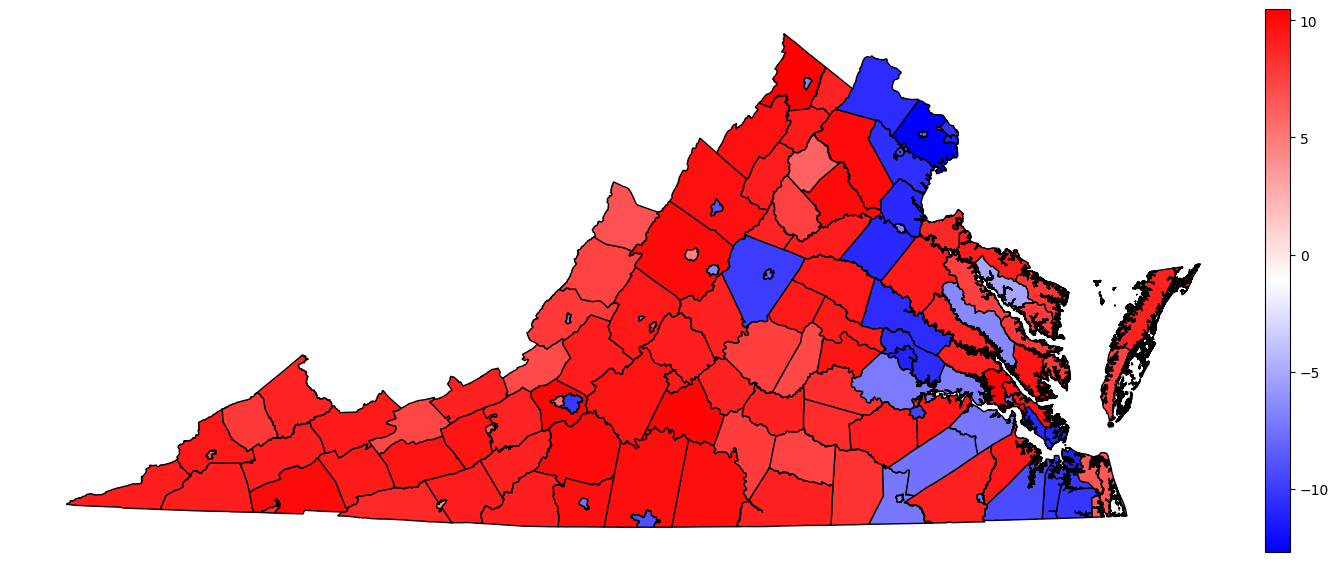

In [26]:
df['vote_diff_ihs'] = np.arcsinh(df['vote_diff'])

fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
df.plot(ax=ax,column='vote_diff_ihs',legend=True,cax=cax,cmap='bwr',edgecolor='k')